Logistic Regression
k-Nearest Neighbors
Decision Trees
Support Vector Machine
Naive Bayes

I suppose we build the model from scratch?
Do we need to preprocess the data? Are there some highly correlated variables?
feature selection.
SVM 


In [104]:
import numpy as np
import pandas as pd
import scipy
import sklearn as sk
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from mlxtend.plotting import plot_decision_regions

df = pd.read_csv("npf_train.csv")
df
df = df.set_index("date")


      id        date    class4  partlybad  CO2168.mean  CO2168.std  \
0      1  2000-01-01  nonevent      False   384.462000    2.284996   
1      2  2000-01-20  nonevent      False   374.884615    0.415185   
2      3  2000-01-23  nonevent      False   373.496585    0.189497   
3      4  2000-02-17  nonevent      False   378.600367    1.934180   
4      5  2000-03-25        Ib      False   373.128684    1.096617   
..   ...         ...       ...        ...          ...         ...   
453  454  2011-08-14  nonevent      False   377.541538    6.391551   
454  455  2011-08-16  nonevent      False   381.016623    4.411571   
455  456  2011-08-18  nonevent      False   386.687895   12.065627   
456  457  2011-08-21  nonevent      False   379.279128   12.045785   
457  458  2011-08-22  nonevent      False   384.443758    6.413297   

     CO2336.mean  CO2336.std  CO242.mean  CO242.std  ...  T672.std   T84.mean  \
0     384.164462    2.135062  385.274688   2.211695  ...  0.525698 -12.422972 

<Figure size 2160x1440 with 0 Axes>

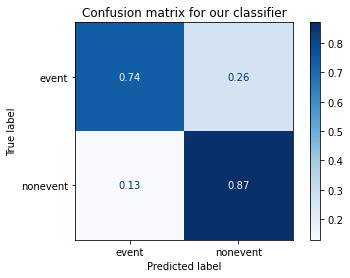

[[3.15000000e+02 0.00000000e+00 3.70077551e+02 ... 6.90409018e-01
  1.67152725e-03 4.85027892e-04]
 [4.52000000e+02 0.00000000e+00 4.01099775e+02 ... 4.82913578e-01
  4.91383679e-03 1.15580454e-03]
 [3.59000000e+02 0.00000000e+00 3.77448880e+02 ... 5.58320064e-01
  6.15891358e-03 7.96902808e-04]
 ...
 [3.60000000e+02 0.00000000e+00 3.81123937e+02 ... 3.41716681e-01
  3.03757595e-03 1.24416938e-03]
 [2.10000000e+01 0.00000000e+00 3.61574537e+02 ... 7.24346747e-01
  4.24648673e-03 9.65462300e-04]
 [3.49000000e+02 0.00000000e+00 3.78386316e+02 ... 9.23022952e-01
  4.76832054e-03 1.95954151e-03]]
accuracy_score:  0.8043478260869565
['event' 'nonevent' 'event' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'event' 'event' 'nonevent' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'event' 'event'
 'event' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'event' 'event' 'event' 'nonevent' 'event' 'nonevent'
 

In [116]:
class2 = np.array(["event"]*df.shape[0],dtype="object")
class2[df["class4"]=="nonevent"] = "nonevent"
df["class2"] = class2
df["class2"] = df["class2"].astype("category")

plt.figure(figsize=(30,20))

dataset = pd.read_csv("npf_train.csv")
class2 = np.array(["event"]*dataset.shape[0],dtype="object")
class2[dataset["class4"]=="nonevent"] = "nonevent"
dataset["class2"] = class2
dataset["class2"] = dataset["class2"].astype("category")
# dataset.class2[dataset.class2 == 'event'] = 1
# dataset.class2[dataset.class2 == 'nonevent'] = 0
dataset["class2"] = pd.get_dummies(dataset["class2"])

print(dataset)
cor = dataset.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
print("cor")
print(cor)
for col in cor.columns:
    print(col)
cor_target = abs(cor["class2"])

relevant_features = cor_target[cor_target>0.5]
print("relevant features: ", relevant_features)

y = df.class2
X = df.drop(["class2", "class4"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Predict the test set
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

# Get support vectors
support_vectors = clf.support_vectors_
print(support_vectors)
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print(y_pred)

clf_rbf = svm.SVC(kernel='rbf', C=1e-11, gamma=1)
clf_rbf =clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

# Generate confusion matrix
# matrix = plot_confusion_matrix(clf_rbf, X_test, y_test,
#                                  cmap=plt.cm.Blues,
#                                  normalize='true')
# plt.title('Confusion matrix for our classifier')
# plt.show(matrix)
# plt.show()

# Get support vectors
support_vectors = clf_rbf.support_vectors_
print(support_vectors)
print("accuracy_score svm_rbf: ", accuracy_score(y_test, y_pred_rbf))


In [93]:
# from sklearn.inspection import permutation_importance
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# %matplotlib inline

# svc =  SVC(kernel='linear',)
# svc.fit(X_train, y_train)

# perm_importance = permutation_importance(svc, X_test, y_test)

# feature_names = list(X_train.columns)
# features = np.array(feature_names)

# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")

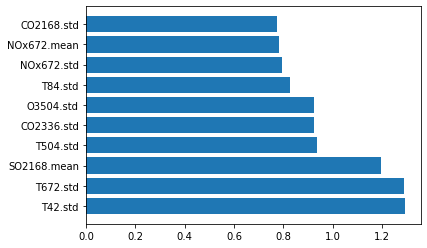

['T42.std', 'T672.std', 'SO2168.mean', 'T504.std', 'CO2336.std', 'O3504.std', 'T84.std', 'NOx672.std', 'NOx672.mean', 'CO2168.std', 'O3504.mean', 'NOx84.std', 'NO42.std', 'O384.mean', 'NOx42.mean', 'O342.mean', 'O342.std', 'UV_A.mean', 'H2O42.std', 'RHIRGA84.mean', 'CO242.mean', 'O3672.std', 'CO2504.mean', 'NO672.mean', 'NO504.mean']
['T42.std', 'T672.std', 'SO2168.mean', 'T504.std', 'CO2336.std', 'O3504.std', 'T84.std', 'NOx672.std', 'NOx672.mean', 'CO2168.std', 'O3504.mean', 'NOx84.std', 'NO42.std', 'O384.mean', 'NOx42.mean', 'O342.mean', 'O342.std', 'UV_A.mean', 'H2O42.std', 'RHIRGA84.mean', 'CO242.mean', 'O3672.std', 'CO2504.mean', 'NO672.mean', 'NO504.mean']


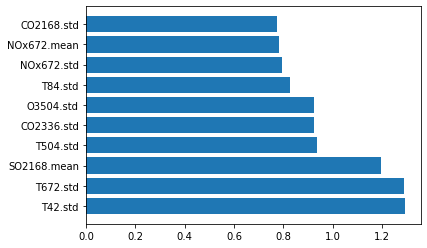

['T42.std', 'T672.std', 'SO2168.mean', 'T504.std', 'CO2336.std', 'O3504.std', 'T84.std', 'NOx672.std', 'NOx672.mean', 'CO2168.std', 'O3504.mean', 'NOx84.std', 'NO42.std', 'O384.mean', 'NOx42.mean', 'O342.mean', 'O342.std', 'UV_A.mean', 'H2O42.std', 'RHIRGA84.mean', 'CO242.mean', 'O3672.std', 'CO2504.mean', 'NO672.mean', 'NO504.mean']
            CO2168.std  CO2336.std  CO242.mean  CO2504.mean  H2O42.std  \
date                                                                     
2000-01-01    2.284996    2.135062  385.274688   383.885077   0.051651   
2000-01-20    0.415185    0.385179  375.621266   374.674177   0.144914   
2000-01-23    0.189497    0.172958  373.961481   373.275062   0.256988   
2000-02-17    1.934180    1.946536  379.785872   378.316909   0.067058   
2000-03-25    1.096617    1.047750  373.701830   372.910000   0.290206   

            NO42.std  NO504.mean  NO672.mean  NOx42.mean  NOx672.mean  ...  \
date                                                               

In [100]:
from sklearn import svm



def f_importances(coef, names, top=-1):
    selected_features = []
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    
    # Show all features
    if top == -1:
        top = len(names)
    
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    selected_features = list(names[::-1][0:top])
    print(selected_features)
    return selected_features
# whatever your features are called
features_names =  list(X_train.columns)

svm2 = svm.SVC(kernel='linear')
svm2.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
print(f_importances(abs(clf.coef_[0]), feature_names, top=10))

X_selected = X[X.columns[X_train.columns.isin(f_importances(abs(clf.coef_[0]), feature_names, top=10))]]

# X_selected = X_selected.drop(['id'], axis=1)
print(X_selected.head())

/Users/anniinasainio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


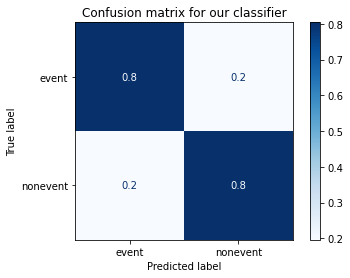

[[1.59025488e+00 1.43913125e+00 3.71524385e+02 ... 1.99791168e+00
  2.67988604e+00 1.87070036e+01]
 [6.88760371e-01 6.40968699e-01 3.89026308e+02 ... 3.92303042e-01
  3.68536469e-01 3.24674038e+00]
 [5.73092136e+00 5.15910338e+00 3.72854182e+02 ... 1.85810518e+00
  2.04088849e+00 1.53039924e+01]
 ...
 [4.18216230e+00 3.76470963e+00 3.64161762e+02 ... 1.72096355e+00
  2.80813183e+00 1.81762392e+01]
 [4.57635728e+00 4.45977672e+00 3.68430455e+02 ... 9.77751477e-01
  1.10660462e+00 5.77578616e+00]
 [6.19809419e+00 5.99271845e+00 3.78420160e+02 ... 2.80987796e+00
  3.48084704e+00 2.14894623e+01]]
accuracy_score2:  0.7608695652173914
['event' 'nonevent' 'event' 'event' 'event' 'nonevent' 'event' 'event'
 'event' 'event' 'event' 'event' 'nonevent' 'nonevent' 'nonevent' 'event'
 'nonevent' 'nonevent' 'nonevent' 'event' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'nonevent' 'event' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'nonevent' 'event' 'event' 'event' 'nonevent'
 'nonevent' 'none

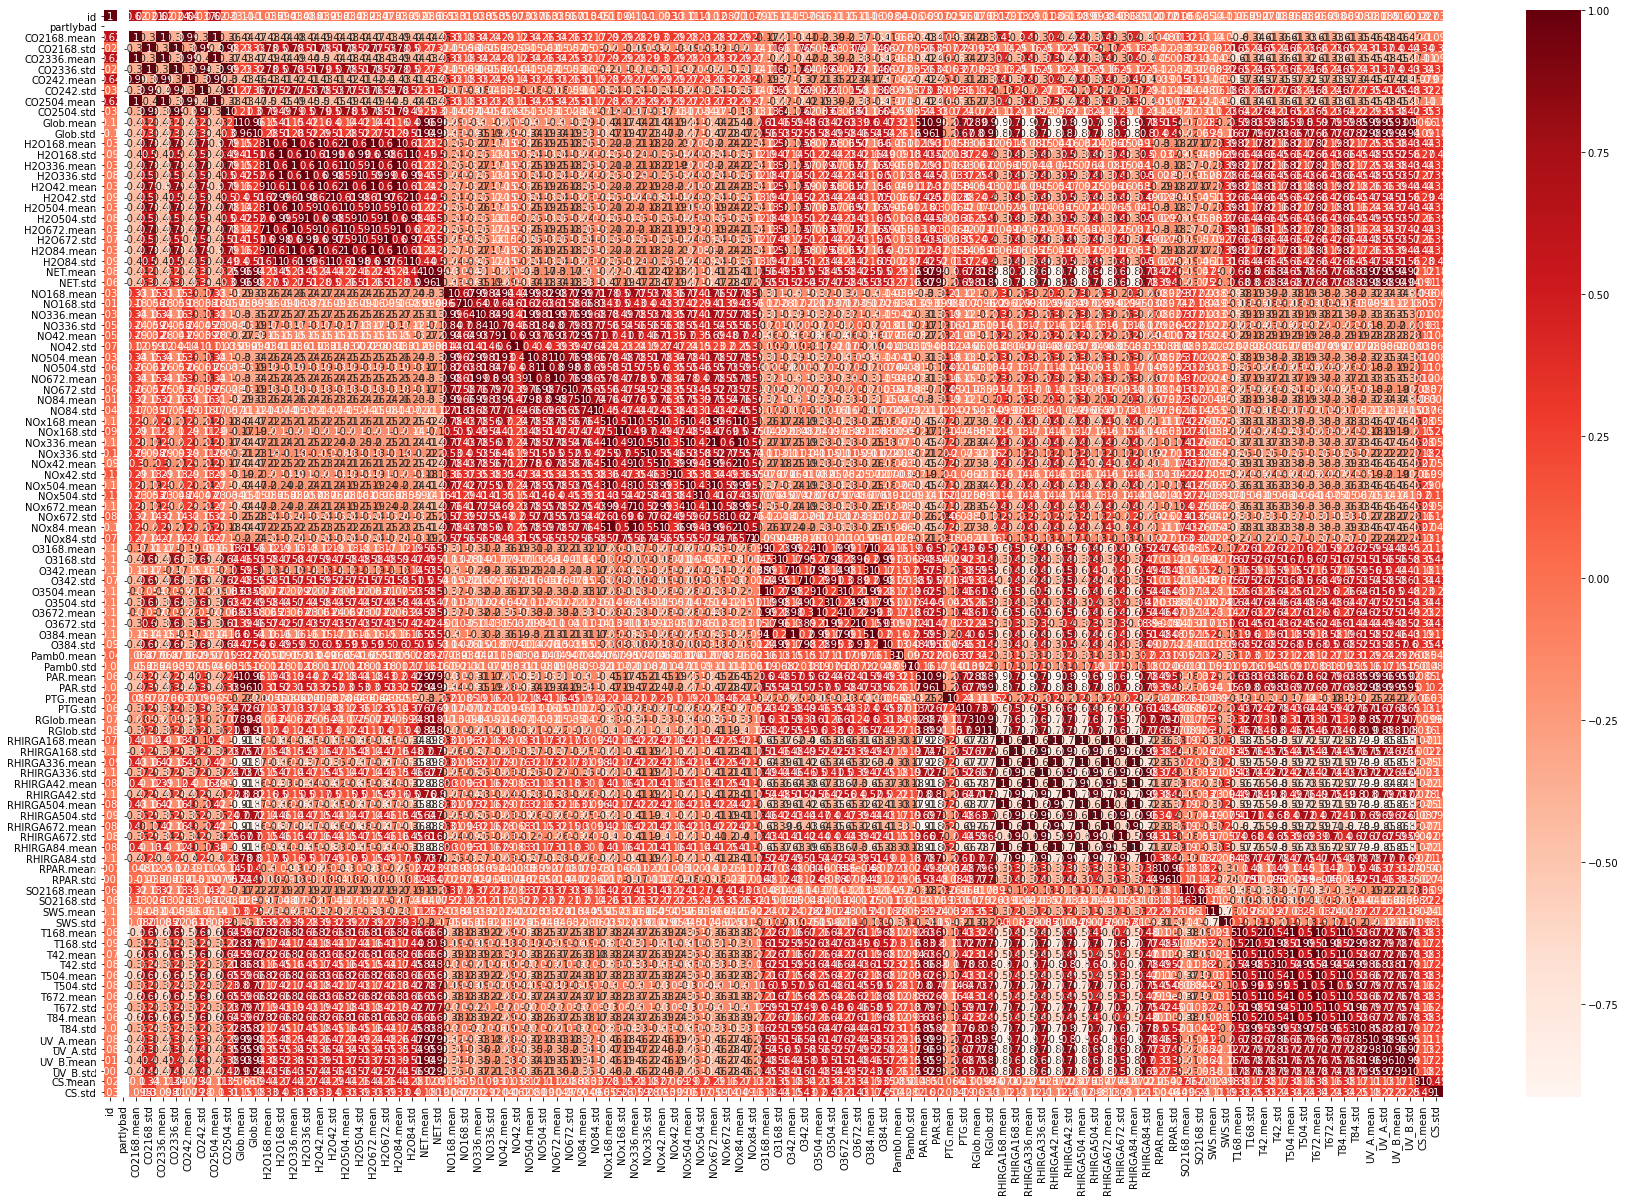

                   id  partlybad  CO2168.mean  CO2168.std  CO2336.mean  \
id           1.000000        NaN     0.619007    0.020611     0.621977   
partlybad         NaN        NaN          NaN         NaN          NaN   
CO2168.mean  0.619007        NaN     1.000000   -0.371986     0.999712   
CO2168.std   0.020611        NaN    -0.371986    1.000000    -0.381345   
CO2336.mean  0.621977        NaN     0.999712   -0.381345     1.000000   
...               ...        ...          ...         ...          ...   
UV_A.std    -0.084700        NaN    -0.481379    0.370380    -0.478239   
UV_B.mean    0.015814        NaN    -0.457928    0.402900    -0.454890   
UV_B.std    -0.001323        NaN    -0.472477    0.435813    -0.470099   
CS.mean     -0.026994        NaN    -0.101836    0.339732    -0.106241   
CS.std      -0.036045        NaN    -0.094851    0.301349    -0.098116   

             CO2336.std  CO242.mean  CO242.std  CO2504.mean  CO2504.std  ...  \
id             0.024024    0.64

In [103]:
from sklearn.linear_model import LogisticRegression

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Predict the test set

clf_logistic = LogisticRegression(random_state=42, max_iter=1000).fit(X_train2, y_train2)
y_pred_logistic = clf_logistic.predict(X_test2)
clf2 = SVC(kernel='linear')
model = svm.SVC(kernel='linear', C=1, gamma=1) 

model_rbf = svm.SVC(kernel='rbf', C=100, gamma=1)
clf2 = model.fit(X_train2, y_train2)
clf3 = model_rbf.fit(X_train2, y_train2)
y_pred3 =clf3.predict(X_test2)

# Generate confusion matrix
matrix2 = plot_confusion_matrix(clf2, X_test2, y_test2,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix2)
plt.show()

# Get support vectors
support_vectors2 = clf2.support_vectors_
print(support_vectors2)
print("accuracy_score2: ", accuracy_score(y_test2, y_pred2))
print(y_pred2)
print("accuracy_score3 rbf: ", accuracy_score(y_test2, y_pred3))
print(y_pred2)
print("accuracy_score logistic: ", accuracy_score(y_test2, y_pred_logistic))



# cor_target = abs(cor["class2"])

# relevant_features = cor_target[cor_target>0.5]
# print(relevant_features)
